In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.columns = df.columns.str.replace(' ','_')


In [7]:
df.head(1)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.columns[df.isna().any()]


Index([], dtype='object')

Plotting


<AxesSubplot: xlabel='quality', ylabel='citric_acid'>

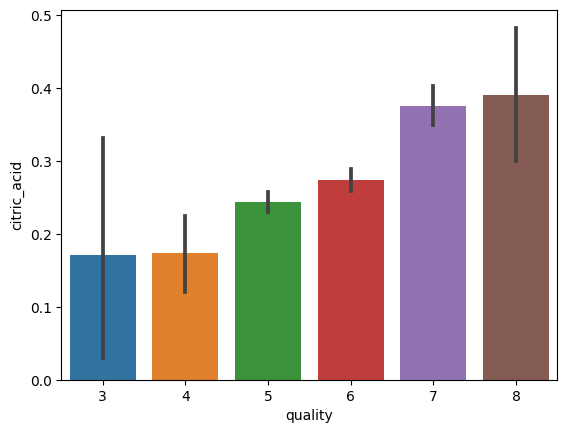

In [9]:
sns.barplot(x='quality',y='citric_acid',data=df)


<AxesSubplot: xlabel='quality', ylabel='chlorides'>

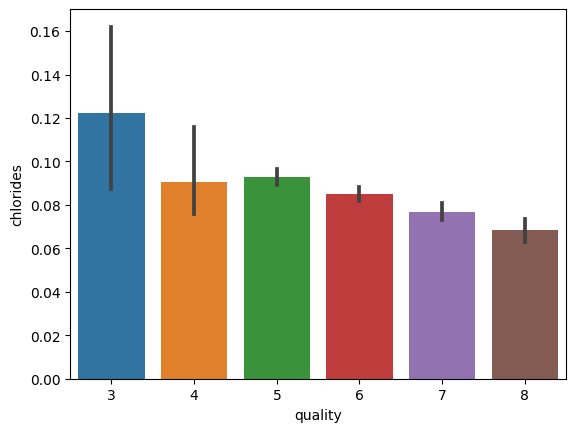

In [10]:
sns.barplot(x='quality',y='chlorides',data=df)


<AxesSubplot: xlabel='quality', ylabel='residual_sugar'>

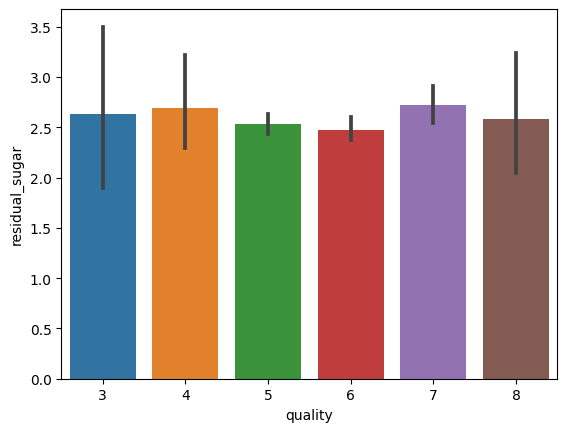

In [11]:
sns.barplot(x='quality',y='residual_sugar',data=df)


<AxesSubplot: xlabel='citric_acid', ylabel='fixed_acidity'>

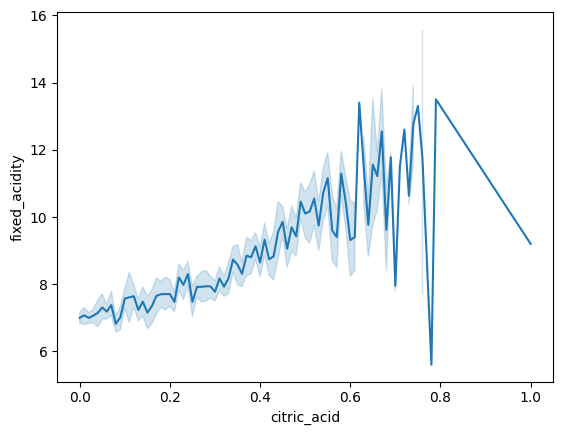

In [12]:
sns.lineplot(x='citric_acid',y='fixed_acidity',data=df)


In [13]:
def qualityupdate(df):
    for i,row in df.iterrows():
        val = row['quality']
        if val  <=6:
            df.at[i,'quality']=0
        else:
            df.at[i,'quality']=1
qualityupdate(df)

In [14]:
df.head(3)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x= df.drop(['quality'],axis=1)
y=df['quality']


In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)


In [20]:
from sklearn.svm import SVC


In [21]:
reg = SVC()


In [22]:
reg.fit(xtrain,ytrain)


SVC()

In [23]:
reg.score(xtest,ytest)


0.875

In [24]:
yp = reg.predict(xtest)


In [26]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(ytest,yp)
c

array([[268,   5],
       [ 35,  12]], dtype=int64)

<AxesSubplot: >

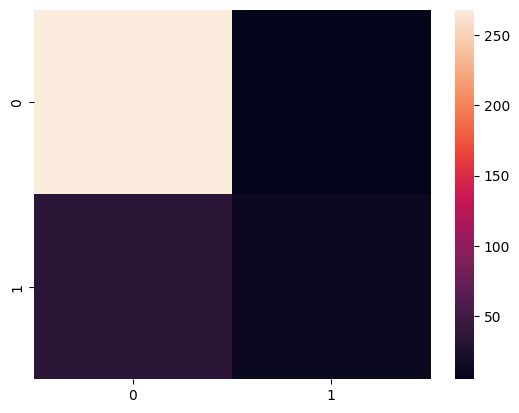

In [27]:
sns.heatmap(c)


In [28]:
from sklearn.model_selection import GridSearchCV


In [30]:
model = GridSearchCV(reg,{
    'C':[0.1,0.4,0.8,1.0,1.3],
    'gamma':[0.1,0.4,0.8,1.0,1.3],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)
model


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [31]:
model.fit(xtrain,ytrain)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [32]:
model.best_params_


{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}

In [33]:
mod = SVC(C=1.3,gamma=1.0,kernel='rbf')


In [34]:
mod.fit(xtrain,ytrain)


SVC(C=1.3, gamma=1.0)

In [35]:
mod.score(xtest,ytest)


0.896875

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=150)

In [41]:
rfc.score(xtest,ytest)


0.890625

In [61]:
from sklearn.model_selection import cross_val_score
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()


0.9108882874015748

In [70]:
df[df['quality'] == 1]



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,1


In [71]:
df[df['quality'] == 0]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [72]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [66]:
a = [[6.0,0.3,0.1,2.4,0.002,10.0,33.0,0.99,4.5,0.55,12.0]]
mod.predict(a)


array([0], dtype=int64)